# Model Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from pylab import rcParams
import plotly.graph_objects as go

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from scripts.helper_functions import *

In [2]:
sie_df = pd.read_csv("./data/arctic_sie_clean.csv")
sie_df.head(10)

,date,extent_million_sq_km
0,1978-10-26,10.231
1,1978-10-28,10.420
2,1978-10-30,10.557
3,1978-11-01,10.670
4,1978-11-03,10.777
5,1978-11-05,10.968
6,1978-11-07,11.080
7,1978-11-09,11.189
8,1978-11-11,11.314
9,1978-11-13,11.460


The dataset contains a daily measurement over a 30-year period. Therefore, we keep the first 25 years for training and the last 5 years for testing. The test size accounts for 60 months between 2013 and 2017. Plus, an additional 3 months in 2018 -- all multiplied by 30 (average number of measurements per month).

### Data Partitioning & Preprocessing

In [3]:
# Set the split boundary
split_date = '2013-01-01'

# Partitioning the dataset
train_nfc = sie_df[sie_df['date'] < split_date]
test_nfc = sie_df[sie_df['date'] >= split_date]

In order to set yearly based limitations to partition the dataset, a split date parameter is used to separate the data at the year's start.

#### Naive Forecast

In [43]:
train_len = len(train_nfc)

# Copy test set
y_hat = test_nfc.copy()
y_hat['naive_forecast'] = train_nfc['extent_million_sq_km'][train_len-1]

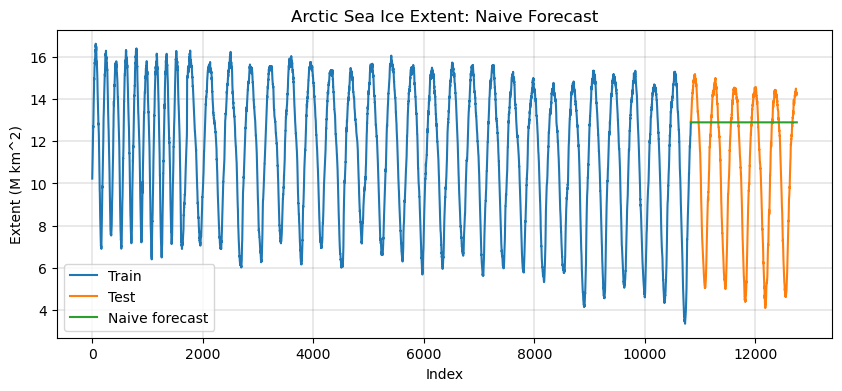

In [48]:
# Train, Test, and Forecast
plt.figure(figsize=(10, 4))
plt.grid(color='grey', linestyle='-', linewidth=0.25)

plt.plot(train_nfc['extent_million_sq_km'], label='Train')
plt.plot(test_nfc['extent_million_sq_km'], label='Test')
plt.plot(y_hat['naive_forecast'], label='Naive forecast')

plt.legend(loc='best')
plt.title('Arctic Sea Ice Extent: Naive Forecast')
plt.xlabel('Index')
plt.ylabel('Extent (M km^2)')

plt.savefig('figures/sie_naive_fc.png')
plt.show()

### Seasonal Naive Forecast

#### Simple Average Forecast

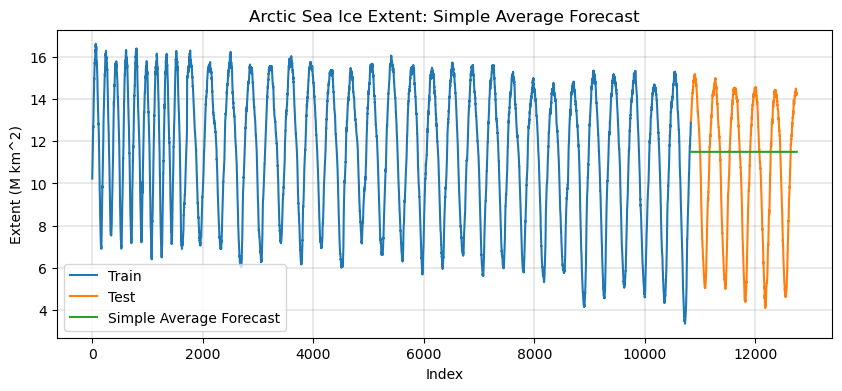

In [49]:
plt.figure(figsize=(10, 4))
plt.grid(color='grey', linestyle='-', linewidth=0.25)

# Average previously observed points
y_hat['avg_forecast'] = train_nfc['extent_million_sq_km'].mean()

plt.plot(train_nfc['extent_million_sq_km'], label='Train')
plt.plot(test_nfc['extent_million_sq_km'], label='Test')
plt.plot(y_hat['avg_forecast'], label='Simple Average Forecast')

plt.legend(loc='best')
plt.title('Arctic Sea Ice Extent: Simple Average Forecast')
plt.xlabel('Index')
plt.ylabel('Extent (M km^2)')

plt.savefig('figures/sie_simpleavg_fc.png')
plt.show()

### Holt's Linear Trend

In [ ]:
# sm.tsa.seasonal_decompose(train.Count).plot()
# result = sm.tsa.stattools.adfuller(train.Count)
# plt.show()

In [ ]:
# y_hat_avg = test.copy()

# fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
# y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

# plt.figure(figsize=(16,8))
# plt.plot(train['Count'], label='Train')
# plt.plot(test['Count'], label='Test')
# plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
# plt.legend(loc='best')
# plt.show()

### Holt-Winters

### ARIMA

### Evaluation Metrics

In [46]:
# TODO: Convert to Function

# Evaluation Metrics
rmse_fc = np.sqrt(mean_squared_error(test_nfc['extent_million_sq_km'], y_hat['naive_forecast'])).round(2)
mape_fc = np.round(np.mean(np.abs(test_nfc['extent_million_sq_km'] - y_hat['naive_forecast']) / test_nfc['extent_million_sq_km']) * 100, 2)

rmse_sa = np.sqrt(mean_squared_error(test_nfc['extent_million_sq_km'], y_hat['avg_forecast'])).round(2)
mape_sa = np.round(np.mean(np.abs(test_nfc['extent_million_sq_km'] - y_hat['avg_forecast']) / test_nfc['extent_million_sq_km']) * 100, 2)

In [47]:
# Print Evaluation Results
results = pd.DataFrame({'Method':['Naive Forecast', 'Seasonal Naive'], 
                        'MAPE': [mape_fc, mape_sa], 
                        'RMSE': [rmse_fc, rmse_sa]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast,4.03,44.08
1,Seasonal Naive,3.47,38.30
